<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyupbit

In [ ]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-strk", interval="minute60")
df

,open,high,low,close,volume,value
2022-09-07 13:00:00,23780.0,23980.0,23680.0,23910.0,6011.742228,1.430109e+08
2022-09-07 17:00:00,23900.0,23970.0,23810.0,23870.0,4139.252980,9.882816e+07
2022-09-07 21:00:00,23840.0,24300.0,23780.0,24180.0,10060.208102,2.413157e+08
2022-09-08 01:00:00,24180.0,24310.0,24070.0,24250.0,3625.401802,8.774051e+07
2022-09-08 05:00:00,24240.0,24710.0,24230.0,24650.0,18657.312474,4.577813e+08
...,...,...,...,...,...,...
2022-10-10 01:00:00,24670.0,24730.0,24330.0,24390.0,67015.695979,1.644333e+09
2022-10-10 05:00:00,24380.0,24750.0,24340.0,24580.0,109454.973151,2.681517e+09
2022-10-10 09:00:00,24570.0,25620.0,23630.0,24140.0,806961.323933,1.966728e+10
2022-10-10 13:00:00,24150.0,24260.0,23800.0,23970.0,146542.191258,3.520109e+09


In [ ]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-09-07 13:00:00,23910.0
1,2022-09-07 17:00:00,23870.0
2,2022-09-07 21:00:00,24180.0
3,2022-09-08 01:00:00,24250.0
4,2022-09-08 05:00:00,24650.0
...,...,...
195,2022-10-10 01:00:00,24390.0
196,2022-10-10 05:00:00,24580.0
197,2022-10-10 09:00:00,24140.0
198,2022-10-10 13:00:00,23970.0


In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=15, freq='H')
forecast = model.predict(future)

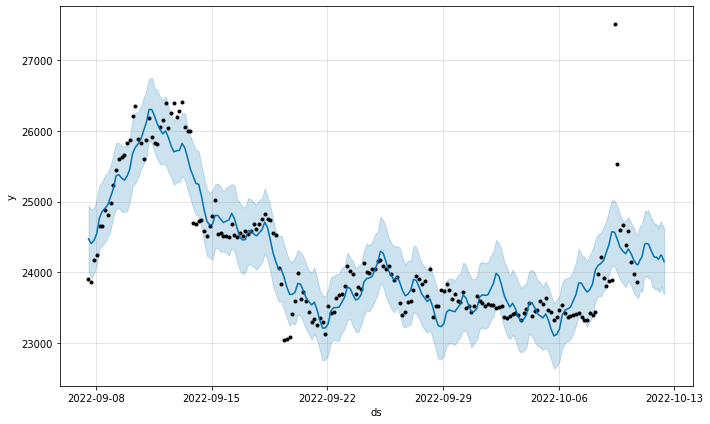

In [ ]:
#그래프1
fig1 = model.plot(forecast)

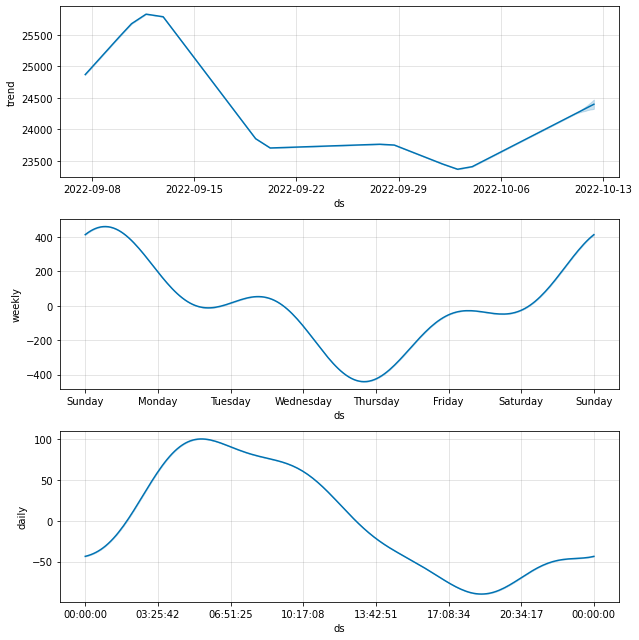

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)